<h1>Подключение необходимых библиотек</h1>

In [ ]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from lightgbm import Dataset, LGBMRegressor, early_stopping, plot_tree, train
from matplotlib.ticker import NullLocator
from scipy.stats import kurtosis, skew
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
    root_mean_squared_error,
)
from sklearn.model_selection import train_test_split
from statsmodels.api import qqplot

<h1>Загрузка данных из CSV</h1>

In [93]:
df = pd.read_csv("diamonds2.csv")
columns_mapping = {
    "carat": "Карат",
    "cut": "Огранка",
    "color": "Цвет",
    "clarity": "Чистота",
    "depth": "Глубина",
    "table": "Площадка",
    "price": "Цена",
    "x": "Длина",
    "y": "Ширина",
    "z": "Высота",
}
df.rename(columns=columns_mapping, inplace=True)
df

,Карат,Огранка,Цвет,Чистота,Глубина,Площадка,Цена,Длина,Ширина,Высота
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<h3>Основная информация о наборе данных</h3>

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Карат     53940 non-null  float64
 1   Огранка   53940 non-null  object 
 2   Цвет      53940 non-null  object 
 3   Чистота   53940 non-null  object 
 4   Глубина   53940 non-null  float64
 5   Площадка  53940 non-null  float64
 6   Цена      53940 non-null  int64  
 7   Длина     53932 non-null  float64
 8   Ширина    53933 non-null  float64
 9   Высота    53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<img src="https://www.bronnitsy.com/upload/medialibrary/113/113d1df9338cf41da2347aaec5f8ed99.jpg">

In [96]:
df.isnull().sum()

Карат        0
Огранка      0
Цвет         0
Чистота      0
Глубина      0
Площадка     0
Цена         0
Длина        8
Ширина       7
Высота      20
dtype: int64

<h2>Удаление пропусков</h2>

In [97]:
df = df.dropna()
df

,Карат,Огранка,Цвет,Чистота,Глубина,Площадка,Цена,Длина,Ширина,Высота
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<h2>Удаление дубликатов</h2>

In [98]:
df = df.drop_duplicates()
df

,Карат,Огранка,Цвет,Чистота,Глубина,Площадка,Цена,Длина,Ширина,Высота
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<h1>Описательные статистики количественных переменных</h1>

In [99]:
df.describe().round(3)

,Карат,Глубина,Площадка,Цена,Длина,Ширина,Высота
count,53775.000,53775.000,53775.000,53775.000,53775.000,53775.000,53775.000
mean,0.798,61.748,57.458,3931.220,5.732,5.735,3.540
std,0.473,1.430,2.233,3985.919,1.119,1.139,0.702
min,0.200,43.000,43.000,326.000,3.730,3.680,1.070
25%,0.400,61.000,56.000,951.000,4.710,4.720,2.910
50%,0.700,61.800,57.000,2401.000,5.700,5.710,3.530
75%,1.040,62.500,59.000,5324.000,6.540,6.540,4.030
max,5.010,79.000,95.000,18823.000,10.740,58.900,31.800


<h2>Судя по описательным статистикам в цене присутствуют потенциальные выбросы.</h2>

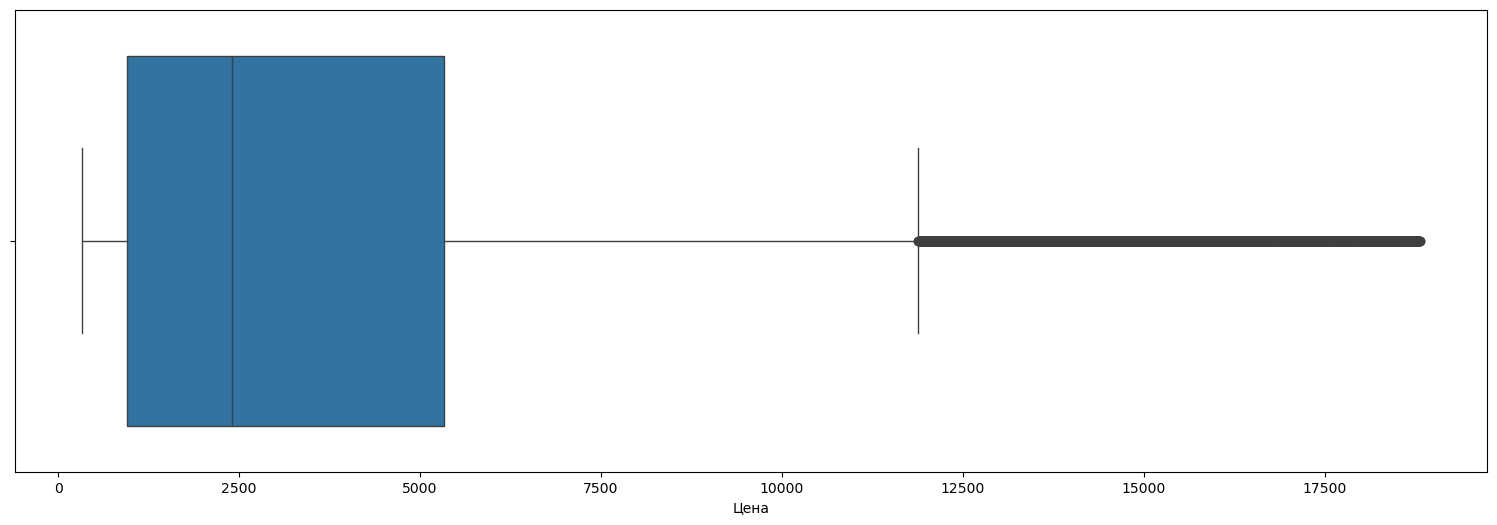

In [100]:
plt.figure(figsize=(19, 6))
sns.boxplot(df, x="Цена")
plt.show()

<h2>В целевой переменной (цена) большое количество значений, которые превышают Q3 + 1.5 * IQR</h2>

In [50]:
def plot_hist_with_kde(data, mode=None, font_size=18):
    plt.figure(figsize=(19, 6))
    plt.title(
        rf"Гистрограмма распределения, $\sigma$ = {data.std():.3f}",
        fontsize=font_size,
    )
    ax = sns.histplot(data, kde=True)
    ax.lines[0].set_color("red")

    plt.axvline(
        x=data.mean(),
        linewidth=6,
        linestyle="--",
        color="g",
        label=f"Среднее = {data.mean():.3f}",
    )

    plt.axvline(
        x=np.median(data),
        linewidth=6,
        linestyle="-.",
        color="m",
        label=f"Медиана = {np.median(data):.3f}",
    )
    if mode is not None:
        plt.axvline(
            x=mode, linewidth=6, linestyle=":", color="k", label=f"Мода = {mode}"
        )
    plt.xlabel("Значения", fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.ylabel("Количество", fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.legend(fontsize=font_size, shadow=True)
    plt.show()

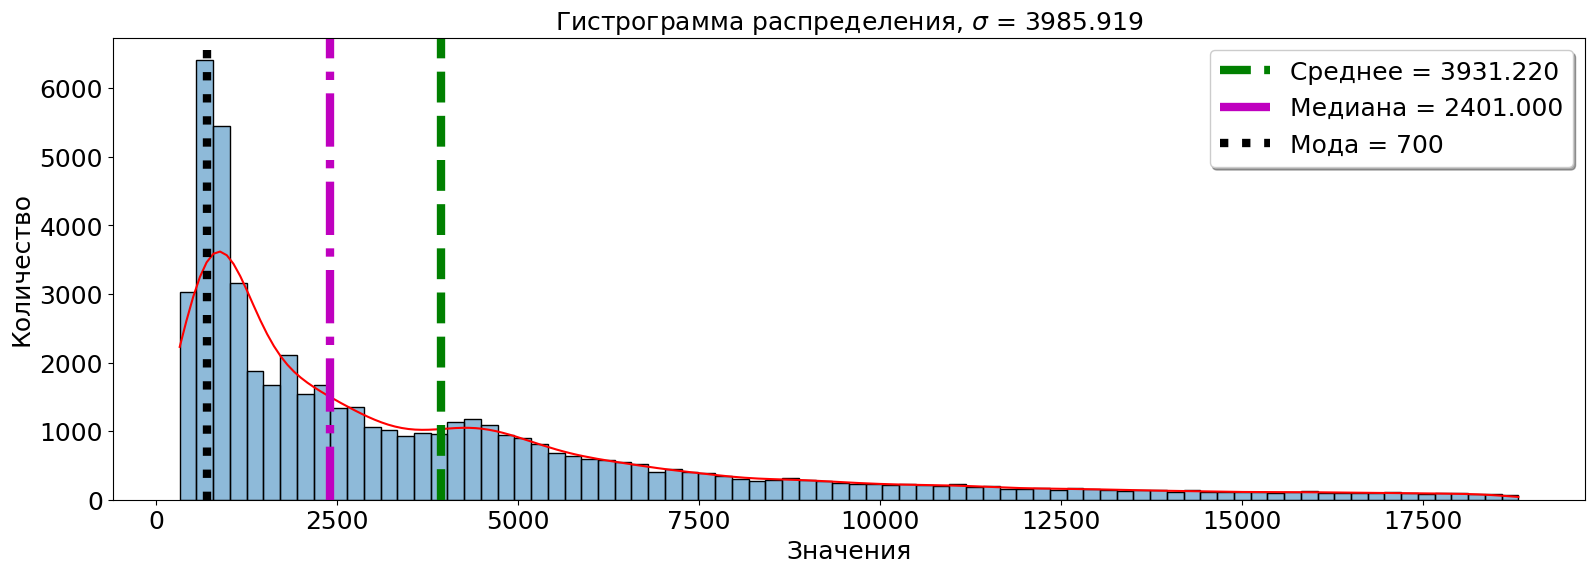

In [51]:
plot_hist_with_kde(df["Цена"], mode=700)

<h2><b>Вывод 1</b>: Распределение цены отлично от нормального. Данные имеют <a href="https://en.wikipedia.org/wiki/Inverse_Gaussian_distribution">распределение Уайльда (обратное распределение Гаусса)</a>. Среднее, медиана и мода не равны. <a href="https://wiki.loginom.ru/articles/3-sigma-rule.html">Правило 3 сигм</a> не выполняется. Распределение не симметрично относительно среднего.</h2>

In [52]:
def plot_qq(data, font_size=18):
    fig, ax = plt.subplots(figsize=(19, 6))
    plt.title("График квантиль-квантиль", fontsize=font_size)
    qqplot(data, line="45", fit=True, ax=ax)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.xlabel("Теоретические квантили", fontsize=font_size)
    plt.ylabel("Фактические квантили", fontsize=font_size)
    plt.show()

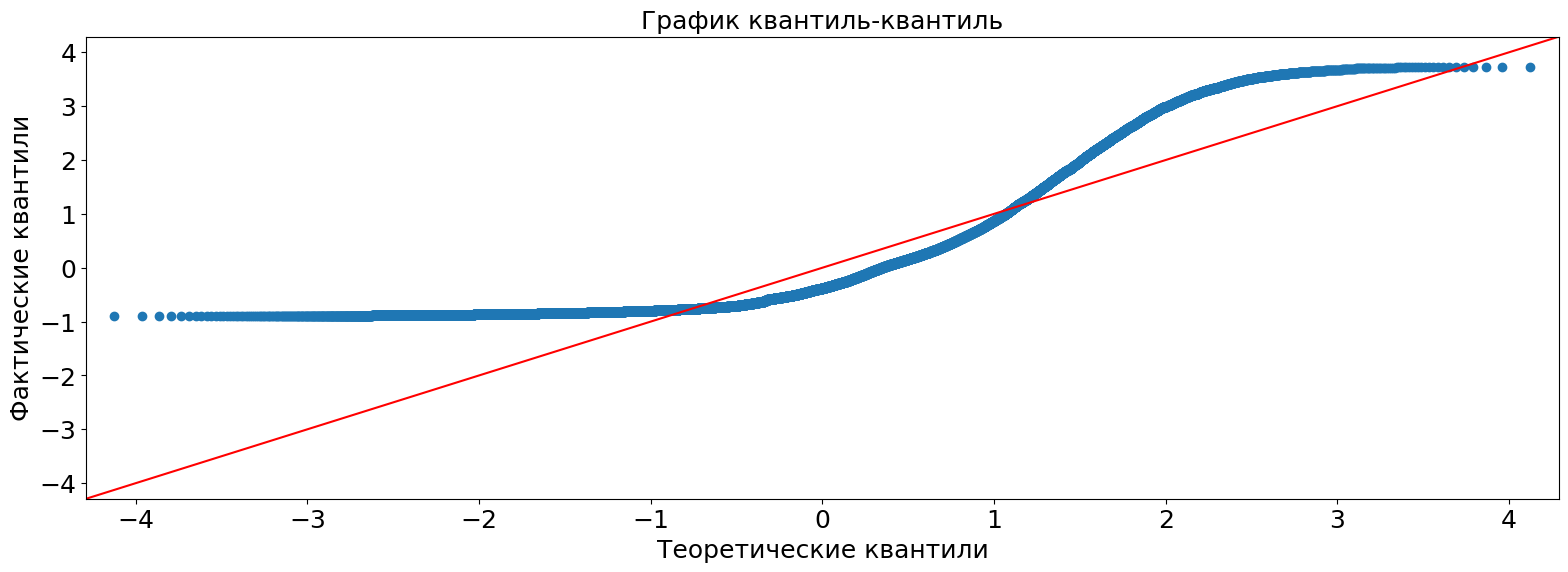

In [53]:
plot_qq(df["Цена"])

<h2><b>Вывод 2</b>: Теоретические (для нормального распределения) и фактические квантили не совпадают.</h2>

In [54]:
skewness = skew(df["Цена"])
print(f"Коэффициент асимметрии равен {round(skewness, 3)}")
kurt = kurtosis(df["Цена"])
print(f"Коэффициент эксцесса равен {round(kurt, 3)}")

Коэффициент асимметрии равен 1.618
Коэффициент эксцесса равен 2.179


<h2><b>Вывод 3</b>: Коэффициенты <a href="https://ru.wikipedia.org/wiki/Коэффициент_асимметрии">асимметрии</a> и <a href="https://en.wikipedia.org/wiki/Kurtosis">эксцесса</a> отличны от показателей для нормального распределения. Коэффициент асимметрии больше нуля - это означает, что данные смещены влево, а хвост распределения вытянут вправо. Коэффициент эксцесса больше нуля - это означает, что распределение имеет более острый пик и более тяжёлые хвосты.</h2>

<h2><b>Вывод 4</b>: Выводы 1 - 3 надо учитывать при подборе модели. Выбросы было решено не удалять, так как часто нужно бывает формировать прогноз и для таких объектов. Для этого лучше подойдут устойчивые регрессионные модели.</h2>

<h1>Описательные статистики категориальных переменных</h1>

In [101]:
df.describe(include="object")

,Огранка,Цвет,Чистота
count,53775,53775,53775
unique,5,7,8
top,Ideal,G,SI1
freq,21485,11254,13030


In [102]:
df["Огранка"].value_counts()

Огранка
Ideal        21485
Premium      13737
Very Good    12068
Good          4888
Fair          1597
Name: count, dtype: int64

In [103]:
df["Цвет"].value_counts()

Цвет
G    11254
E     9776
F     9517
H     8266
D     6754
I     5406
J     2802
Name: count, dtype: int64

In [104]:
df["Чистота"].value_counts()

Чистота
SI1     13030
VS2     12225
SI2      9142
VS1      8155
VVS2     5056
VVS1     3646
IF       1784
I1        737
Name: count, dtype: int64

<img src="https://sunlight.net/wiki/wp-content/uploads/2021/04/diamods_characteristics_1.jpg">

<h2><b>Вывод 5</b>: Все эти категориальные данные влияют на стоимость бриллиантов исходя из предметной области.</h2>

<h1>Анализ зависимостей в данных с помощью коэффицента корреляции Спирмена</h1>

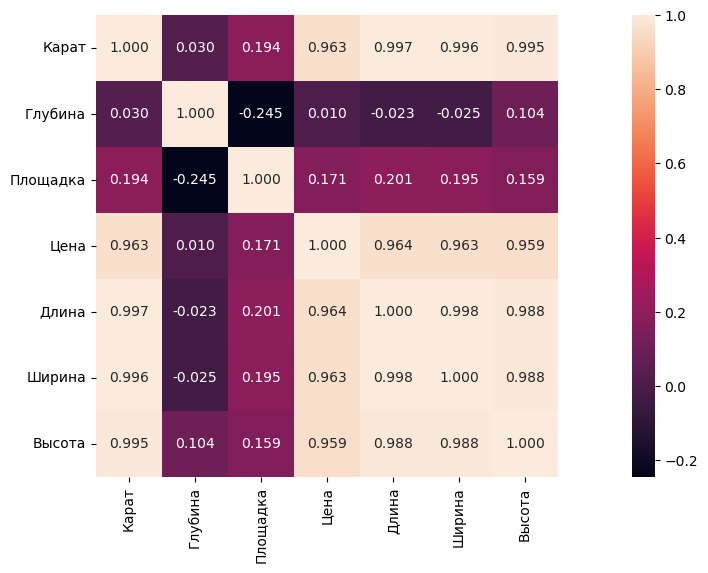

In [64]:
plt.figure(figsize=(19, 6))
sns.heatmap(
    df.select_dtypes(exclude="object").corr(method="spearman").round(3),
    square=True,
    annot=True,
    fmt=".3f",
)
plt.show()

<h2><b>Вывод 6</b>: Карат имеет сильную положительную монотонную корреляцию с ценой. В данных есть <a href="ru.wikipedia.org/wiki/Мультиколлинеарность">мультиколлинеарность</a> - сильная корреляцию между факторами: Карат, Длина, Ширина, Высота. Из этих факторов было решено оставить только Карат, так как он имеет наибольшую зависимость с целевой переменной. Площадка и Глубина имеют слабую монотонную зависимость с целевой переменной, но возможно там более сложная закономерность. Это нужно проверить с помощью диаграмм рассеяния.</h2>

In [105]:
df = df.drop(columns=["Длина", "Ширина", "Высота"])
df

,Карат,Огранка,Цвет,Чистота,Глубина,Площадка,Цена
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757
53936,0.72,Good,D,SI1,63.1,55.0,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,2757
53938,0.86,Premium,H,SI2,61.0,58.0,2757


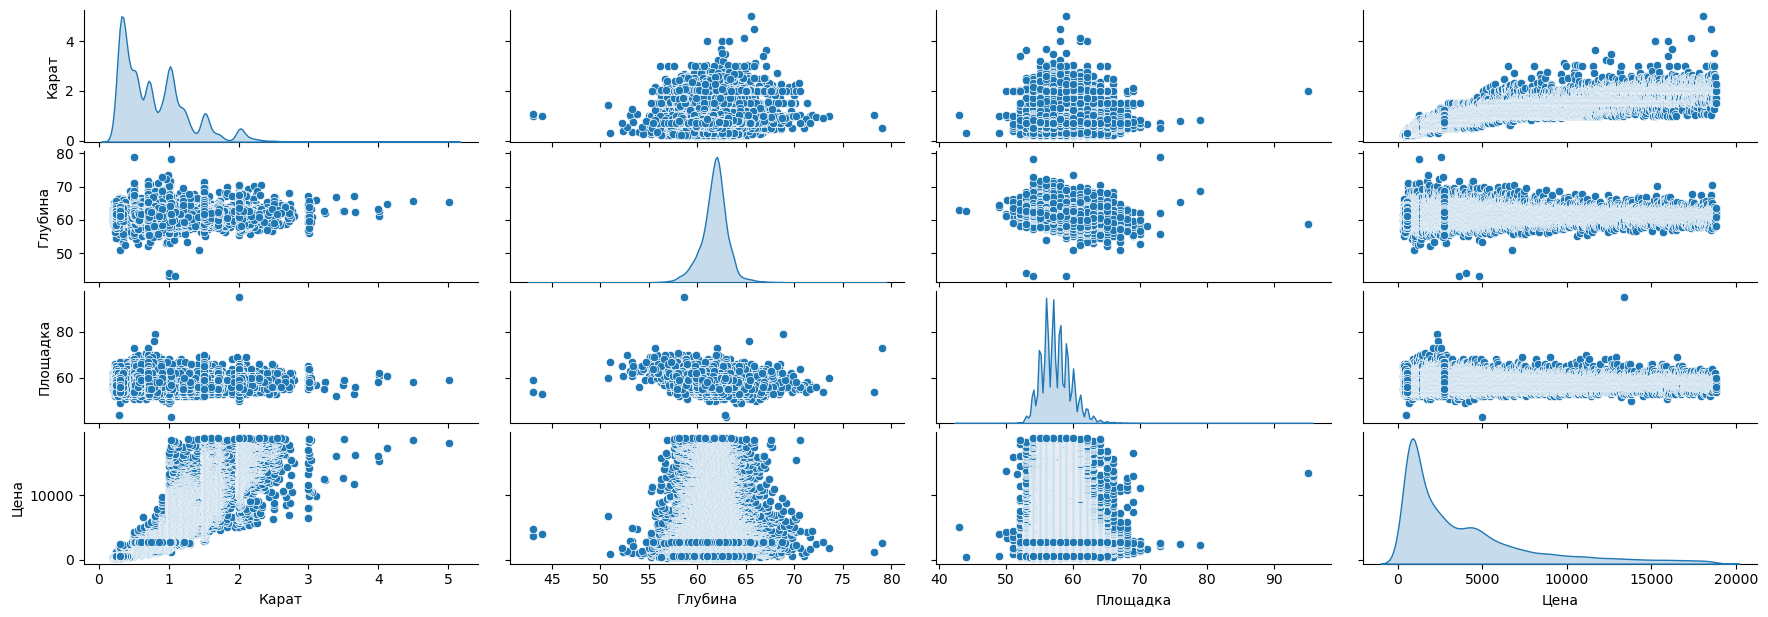

In [66]:
fig = sns.pairplot(df, diag_kind="kde", corner=False)
fig.fig.set_size_inches(19, 6)
plt.show()

<h2><b>Вывод 7</b>: Карат повторяет вид распределения Цены. Распределение Глубины больше похоже на нормальное. Площадка имеет распределение близкое к обратному нормальному. Судя по диаграмме рассеяния факторы Глубина и Площадка существенно не влияют на цену. Поэтому их нужно удалить.</h2>

In [106]:
df = df.drop(columns=["Глубина", "Площадка"])
df

,Карат,Огранка,Цвет,Чистота,Цена
0,0.23,Ideal,E,SI2,326
1,0.21,Premium,E,SI1,326
2,0.23,Good,E,VS1,327
3,0.29,Premium,I,VS2,334
4,0.31,Good,J,SI2,335
...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757
53936,0.72,Good,D,SI1,2757
53937,0.70,Very Good,D,SI1,2757
53938,0.86,Premium,H,SI2,2757


<h1>Преобразуем типы данных для лучшего быстродействия</h1>

In [107]:
for column in df.select_dtypes(include=["float64", "int64"]):
    df[column] = df[column].astype("float32")

for column in df.select_dtypes(include="object"):
    df[column] = df[column].astype("category")

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53775 entries, 0 to 53939
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Карат    53775 non-null  float32 
 1   Огранка  53775 non-null  category
 2   Цвет     53775 non-null  category
 3   Чистота  53775 non-null  category
 4   Цена     53775 non-null  float32 
dtypes: category(3), float32(2)
memory usage: 998.7 KB


In [109]:
df

,Карат,Огранка,Цвет,Чистота,Цена
0,0.23,Ideal,E,SI2,326.0
1,0.21,Premium,E,SI1,326.0
2,0.23,Good,E,VS1,327.0
3,0.29,Premium,I,VS2,334.0
4,0.31,Good,J,SI2,335.0
...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757.0
53936,0.72,Good,D,SI1,2757.0
53937,0.70,Very Good,D,SI1,2757.0
53938,0.86,Premium,H,SI2,2757.0


In [110]:
y = df["Цена"]
X = df.drop(columns=["Цена"])
X

,Карат,Огранка,Цвет,Чистота
0,0.23,Ideal,E,SI2
1,0.21,Premium,E,SI1
2,0.23,Good,E,VS1
3,0.29,Premium,I,VS2
4,0.31,Good,J,SI2
...,...,...,...,...
53935,0.72,Ideal,D,SI1
53936,0.72,Good,D,SI1
53937,0.70,Very Good,D,SI1
53938,0.86,Premium,H,SI2


<h1>Разбиение выборки на тренировочную, тестовую и валидационную</h1>

In [111]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, shuffle=True, test_size=0.2, random_state=1
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    shuffle=True,
    test_size=0.5,
    random_state=1,
)

<h1>Обучение базовой модели</h1>

In [112]:
model = LGBMRegressor(
    n_jobs=-1,
    random_state=1,
    force_col_wise=True,
    importance_type="gain",
    objective="mae",
).fit(X_train, y_train)

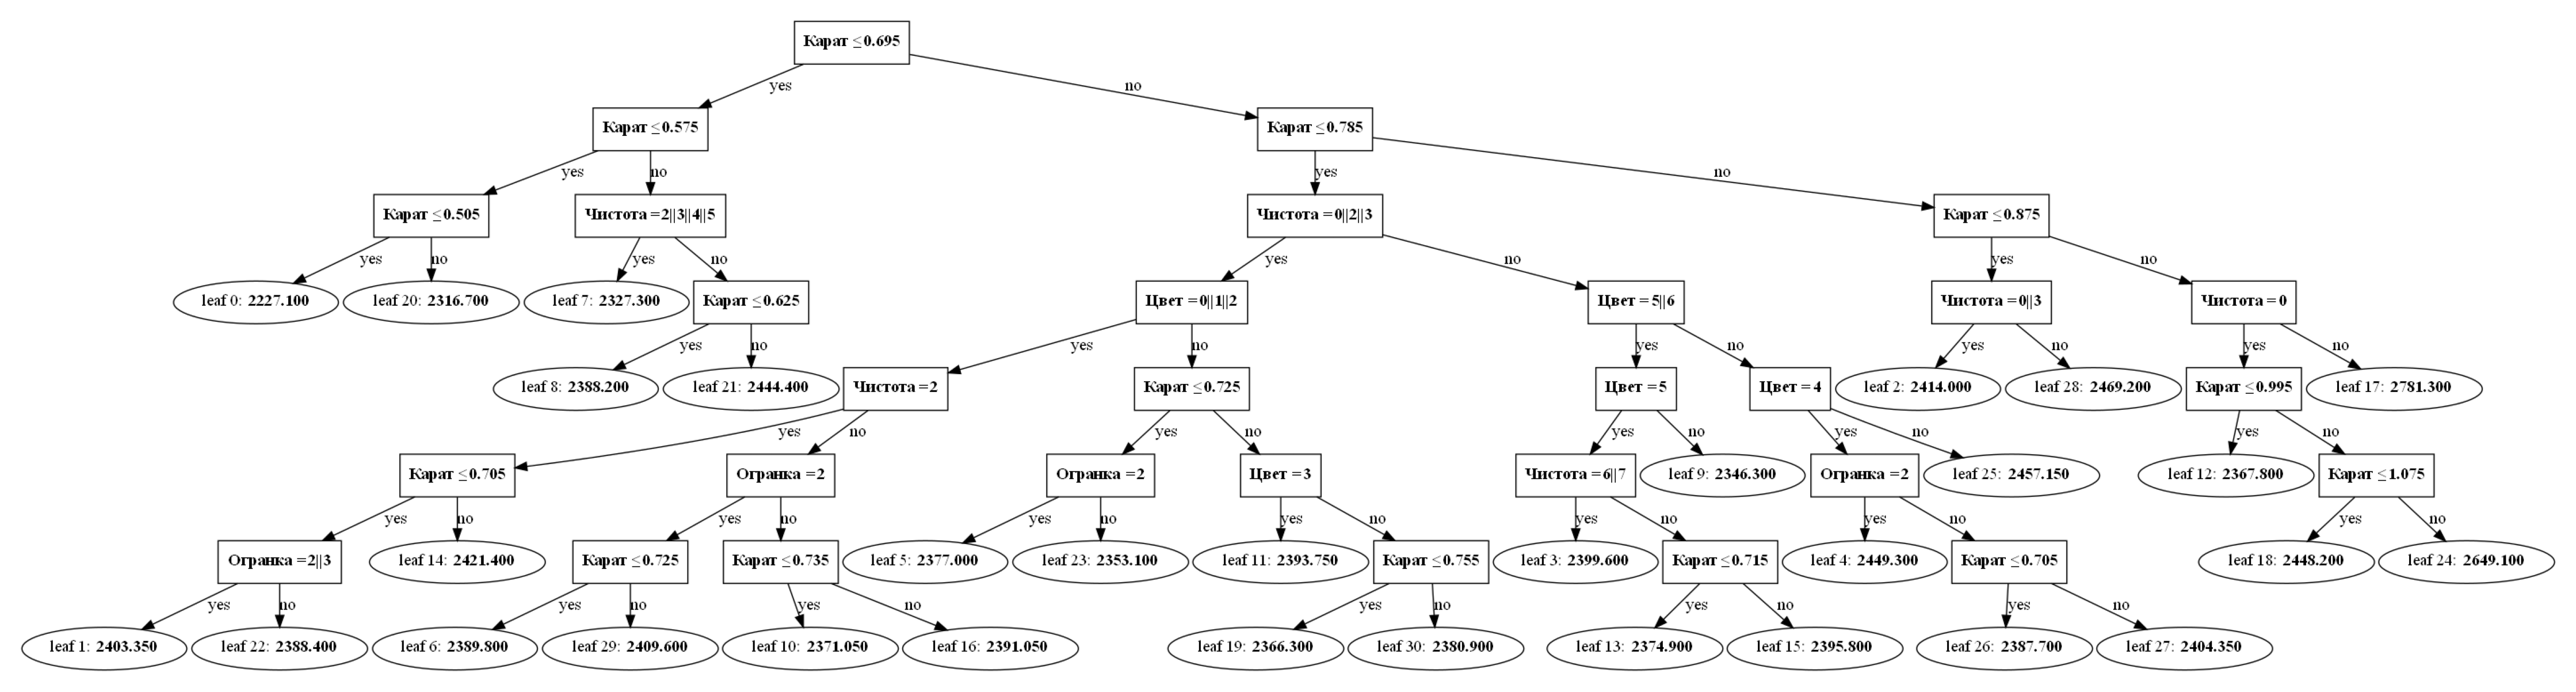

In [74]:
plot_tree(model, figsize=(19, 6), tree_index=0, orientation="vertical", dpi=300)
plt.show()

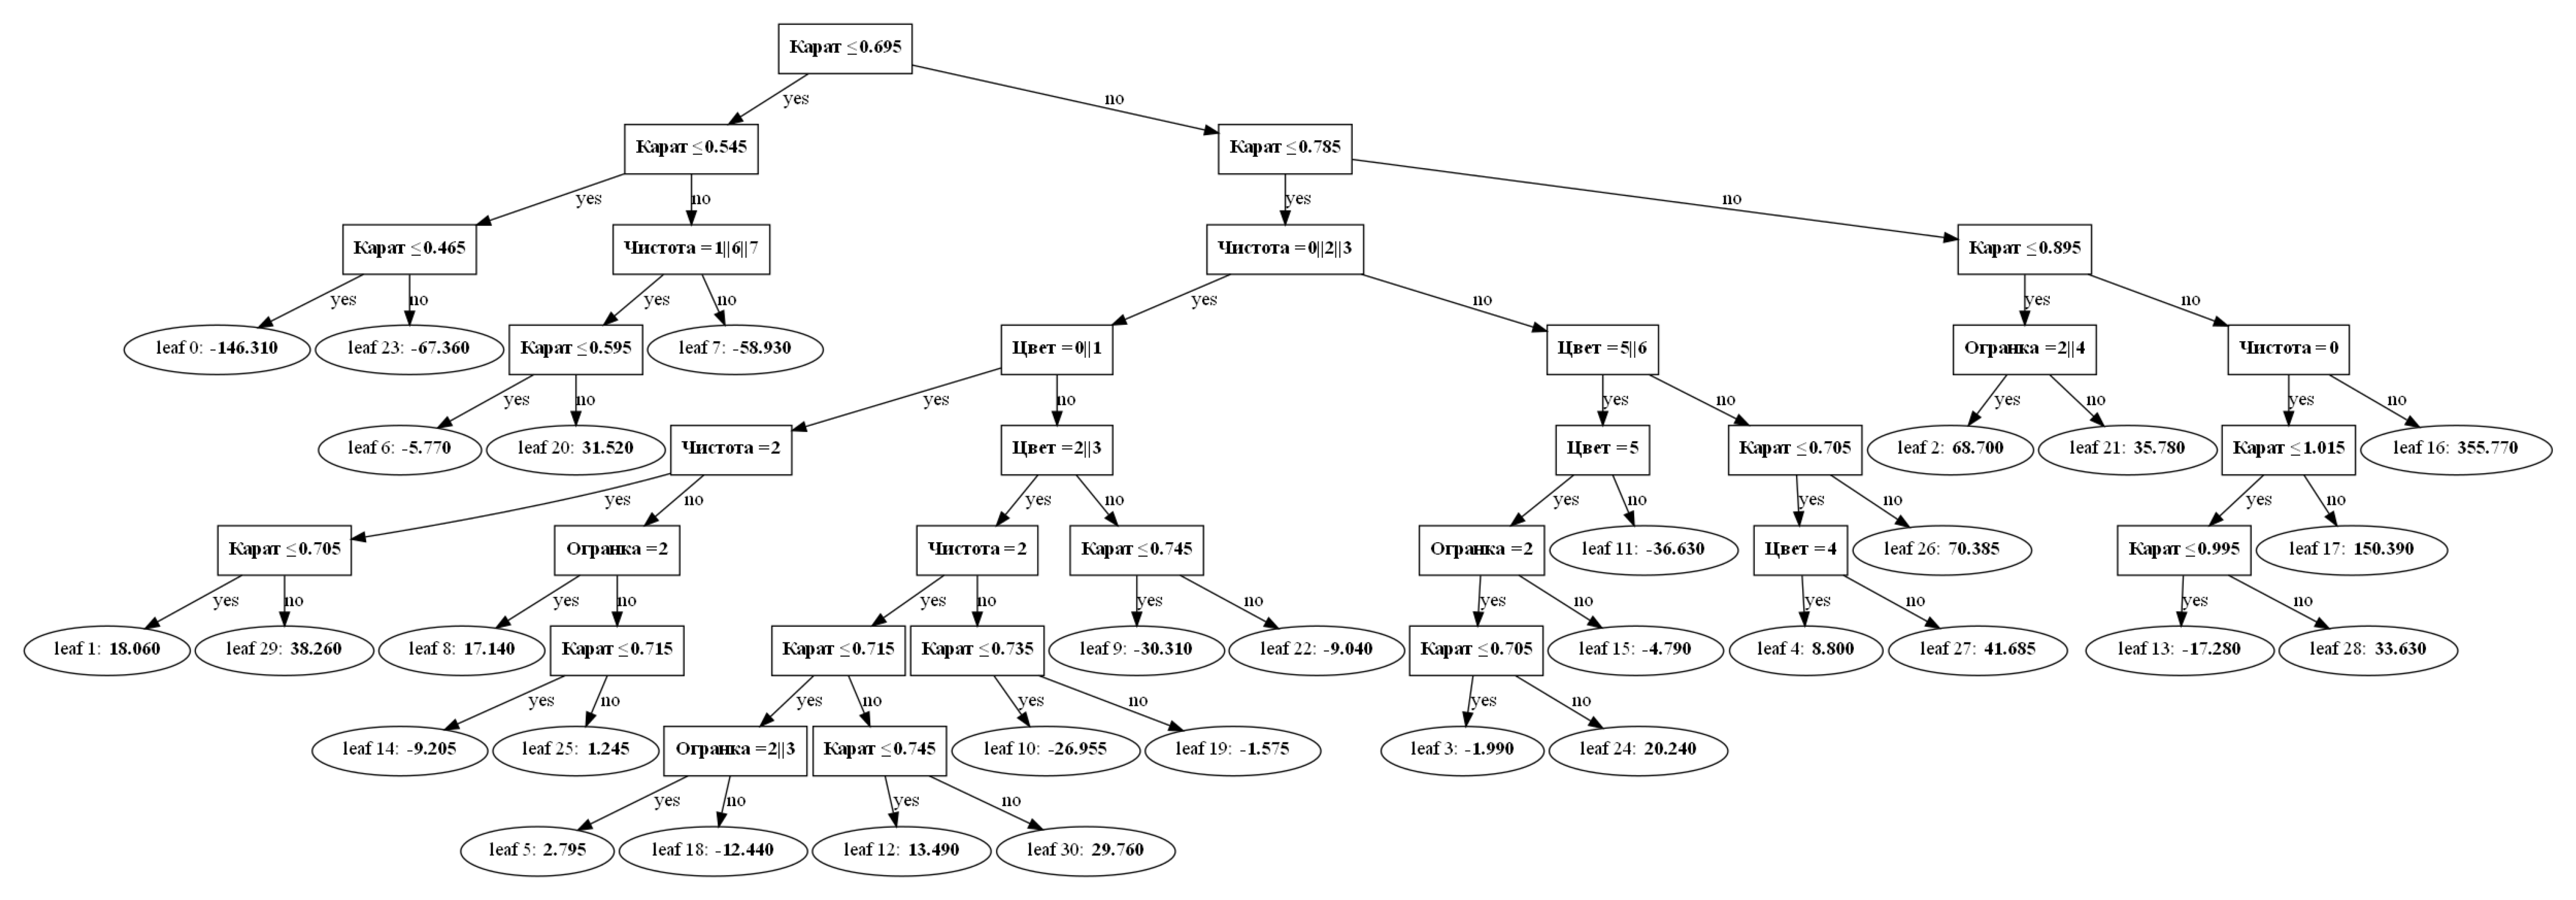

In [75]:
plot_tree(model, figsize=(19, 6), tree_index=1, orientation="vertical", dpi=300)
plt.show()

In [76]:
feature_importances_percent = pd.DataFrame(
    data=(model.feature_importances_ / model.feature_importances_.sum() * 100).round(3),
    index=X_train.columns,
    columns=["information gain (%)"],
).sort_values(by="information gain (%)", ascending=False)
feature_importances_percent

,information gain (%)
Карат,78.822
Чистота,9.543
Цвет,8.624
Огранка,3.012


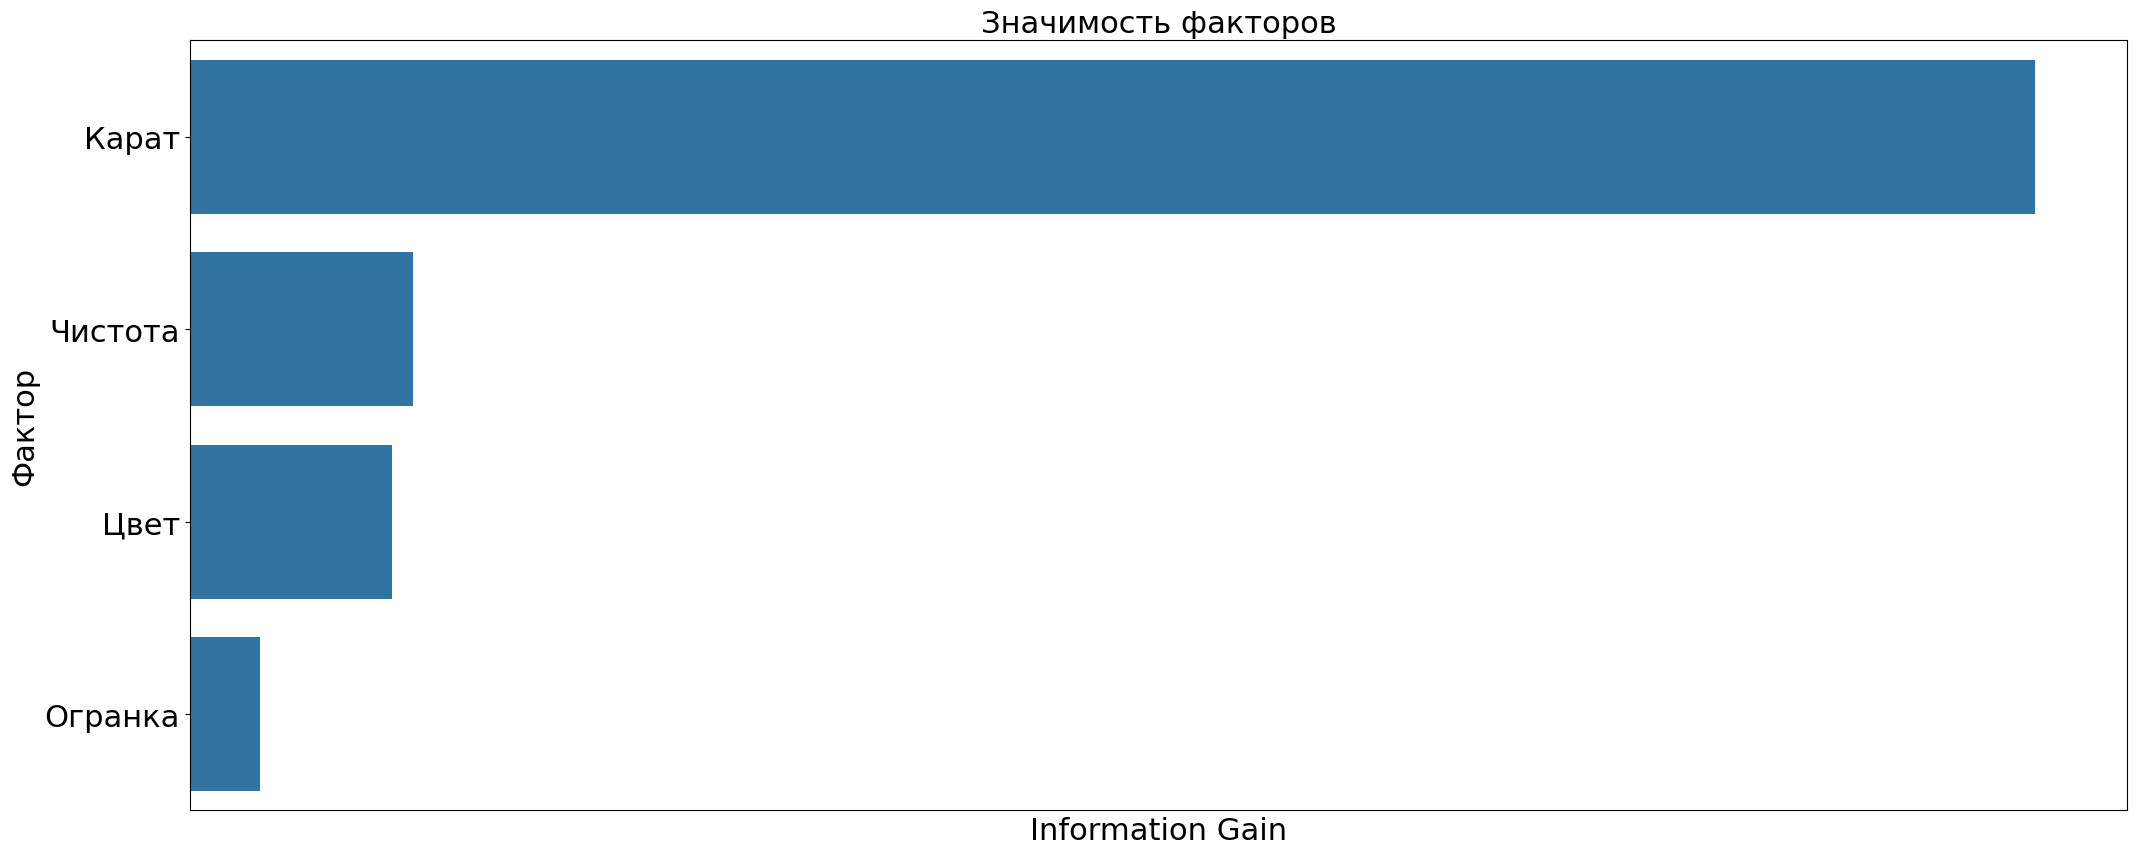

In [77]:
plt.figure(figsize=(25, 10))
ax2 = sns.barplot(
    feature_importances_percent, x="information gain (%)", y=feature_importances_percent.index
)
ax2.xaxis.set_major_locator(NullLocator())
plt.title("Значимость факторов", fontsize=22)
plt.xlabel("Information Gain", fontsize=22)
plt.ylabel("Фактор", fontsize=22)
plt.yticks(fontsize=22)
plt.show()

<h2><b>Вывод 8</b>: Наиболее значимым фактором является Карат. Из категориальных переменных - Чистота. Первые три фактора: Карат, Чистота и Цвет обеспечивают 97 % прироста информации для модели.</h2>

<h1>Оценка модели</h1>

In [78]:
def evaluate(y_true, y_pred, feautures_count):
    RMSE = root_mean_squared_error(y_true, y_pred)
    print(f"RMSE равняется {RMSE:.3f}")
    MAE = mean_absolute_error(y_true, y_pred)
    print(f"MAE равняется {MAE:.3f}")
    MAPE = mean_absolute_percentage_error(y_true, y_pred) * 100
    print(f"MAPE равняется {MAPE:.3f} %")
    N: int = len(y_pred)
    R2 = r2_score(y_true, y_pred)
    Adj_R2 = 1 - (1 - R2) * (N - 1) / (N - feautures_count - 1)
    print(f"Adjusted R2 равняется {Adj_R2:.3f}")

In [79]:
y_pred_train = model.predict(X_train).round()
evaluate(y_train, y_pred_train, len(X_train.columns))

RMSE равняется 562.479
MAE равняется 279.081
MAPE равняется 7.523 %
Adjusted R2 равняется 0.980


In [80]:
y_pred_val = model.predict(X_val).round()
evaluate(y_val, y_pred_val, len(X_train.columns))

RMSE равняется 559.371
MAE равняется 288.378
MAPE равняется 7.624 %
Adjusted R2 равняется 0.980


<center><h2>Метрики качества базовой модели </h2>
<table>
  <tr>
    <td></td>
    <td><b>Train</b></td>
    <td><b>Validation</b></td>
  </tr>
  <tr>
    <td><b>RMSE</b></td>
    <td>562.479</td>
    <td>559.371</td>
  </tr>
  <tr>
    <td><b>MAE</b></td>
    <td>279.081</td>
    <td>288.378</td>
  </tr>
  <tr>
    <td><b>MAPE (%)</b></td>
    <td>7.523</td>
    <td>7.624</td>
  </tr>
  <tr>
    <td><b>R<sup>2</sup><sub>adjusted</sub></b></td>
    <td>0.980</td>
    <td>0.980</td>
  </tr>
</table></center>

<h2><b>Вывод 9</b>: Показатели на обучающей и валидационной выборке не сильно отличаются, отсутствует переобучение. Учитывая, что в данных присутствуют выбросы, ошибка в 7.6 % является неплохим результатом.</h2>

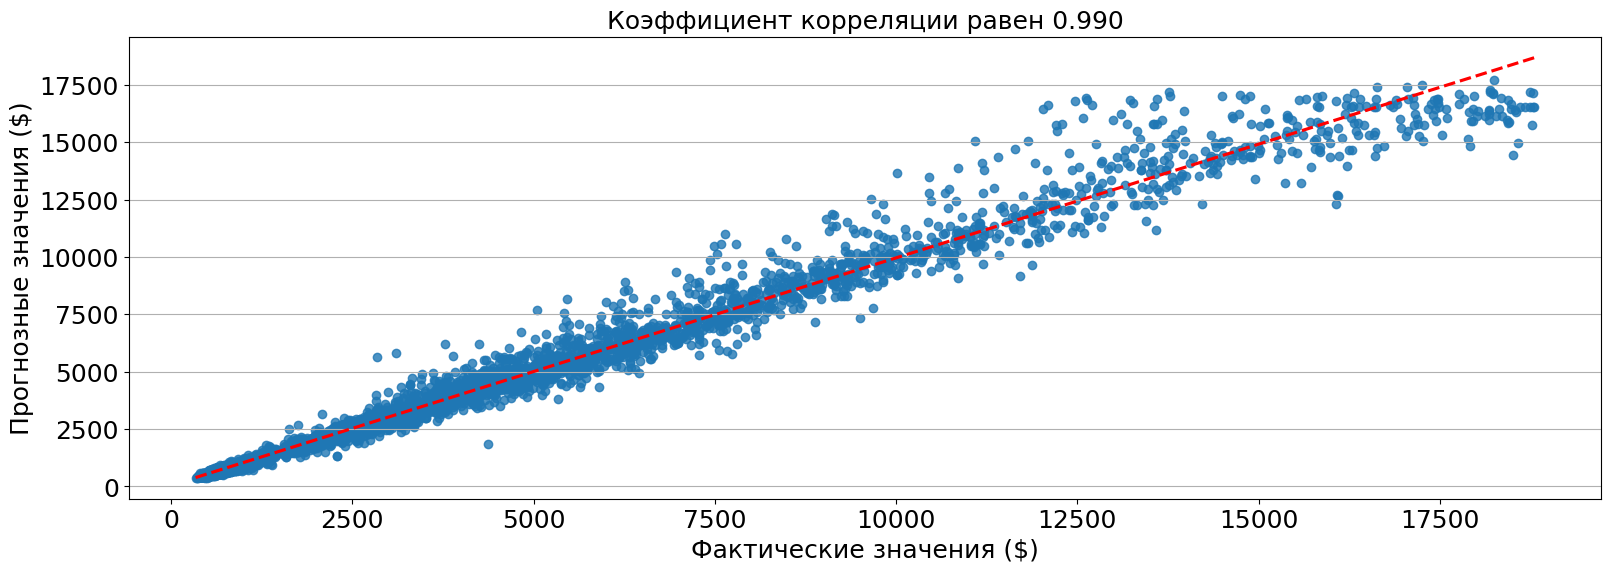

In [81]:
plt.figure(figsize=(19, 6))
coef_corr = np.corrcoef(y_val.values, y_pred_val)[0, 1]
plt.title(f"Коэффициент корреляции равен {coef_corr:.3f}", fontsize=18)
sns.regplot(x=y_val, y=y_pred_val, ci=None, line_kws=dict(color="r", linestyle="--"))
plt.xlabel("Фактические значения ($)", fontsize=18)
plt.ylabel("Прогнозные значения ($)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(axis="y")
plt.show()

<h2><b>Вывод 10</b>: Коэффициент линейной корреляции Пирсона между фактическими и прогнозными значениями очень большой. Это также подтвержает, что модель хорошо справляется с прогнозами на валидационной выборке.</h2>

<h1>Анализ остатков модели на валидационной выборке</h1>

In [82]:
errors = np.round(y_val - y_pred_val, 3)
errors

18606     258.0
24956    1122.0
19049    -111.0
18649     858.0
29684      -3.0
          ...  
13807   -1437.0
956      -304.0
51347     -32.0
45750    -398.0
35522     -11.0
Name: Цена, Length: 5377, dtype: float64

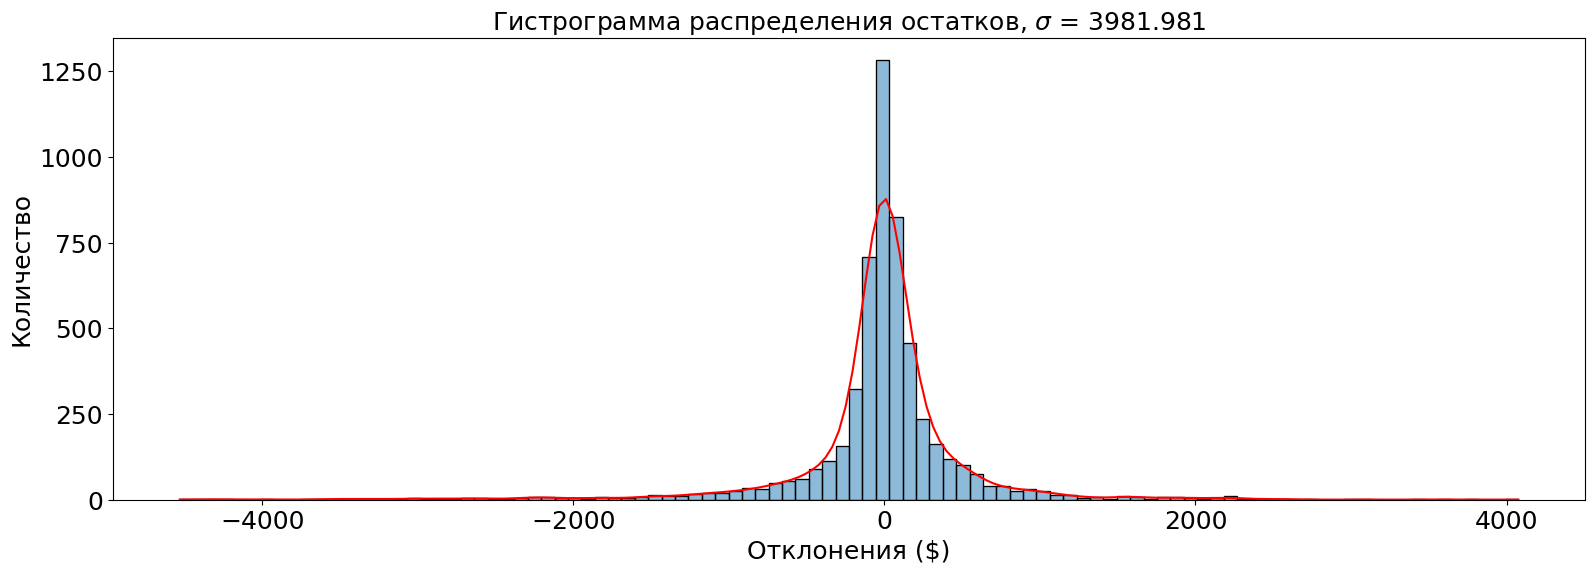

In [83]:
plt.figure(figsize=(19, 6))
ax = sns.histplot(x=errors, kde=True, bins=100)
ax.lines[0].set_color("red")
plt.title(
    rf"Гистрограмма распределения остатков, $\sigma$ = {y_val.std():.3f}",
    fontsize=18,
)
plt.xticks(np.arange(-4_000, 5_000, 2_000), fontsize=18)
plt.xlabel("Отклонения ($)", fontsize=18)
plt.yticks(np.arange(0, 1_500, 250), fontsize=18)
plt.ylabel("Количество", fontsize=18)
plt.show()

<h2><b>Вывод 11</b>: Отклонения не превышают 2 сигм и в основном находятся в окрестности нуля. Распределение остатков похоже на нормальное.</h2>

<h1>Подбор гиперпараметров в попытке улучшить качество</h1>

In [84]:
categorical_features = X_train.select_dtypes(include="category").columns.to_list()
categorical_features

['Огранка', 'Цвет', 'Чистота']

In [85]:
train_data = Dataset(
    data=X_train, label=y_train, categorical_feature=categorical_features
)
val_data = Dataset(data=X_val, label=y_val, categorical_feature=categorical_features)

In [113]:
main_params = {
    "objective": "mae",
    "metric": "mae",
    "force_col_wise": "true",
    "random_state": 1,
    "verbose": -1,
    "bagging_freq": 1,
}

In [ ]:
model = train(
    main_params,
    train_data,
    num_boost_round=5_000,
    valid_sets=[val_data],
    callbacks=[early_stopping(50)],
)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[442]	valid_0's l1: 276.083


<h3>Подбор num_leaves</h3>

In [ ]:
best_params = {"num_leaves": 1, "mae": 1_000}
for num_leaves in range(7, 50):
    model = LGBMRegressor(
        n_estimators=442,
        random_state=1,
        bagging_freq=1,
        n_jobs=-1,
        verbose=-1,
        objective="mae",
        num_leaves=num_leaves,
    )
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    metric = round(mean_absolute_error(y_val, y_pred_val))
    if metric < best_params["mae"]:
        best_params["num_leaves"] = num_leaves
        best_params["mae"] = metric

In [26]:
best_params

{'num_leaves': 43, 'mae': 272}

In [ ]:
main_params["num_leaves"] = best_params["num_leaves"]
main_params

<h3>Обновляем n_estimators</h3>

In [31]:
model = train(
    main_params,
    train_data,
    num_boost_round=5_000,
    valid_sets=[val_data],
    callbacks=[early_stopping(50)],
)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[780]	valid_0's l1: 270.626


<h1>Обучение новой модели</h1>

In [86]:
model_new = LGBMRegressor(
    n_jobs=-1,
    random_state=1,
    force_col_wise=True,
    importance_type="gain",
    objective="mae",
    n_estimators=780,
    num_leaves=43,
).fit(X_train, y_train)

In [87]:
y_pred_train = model_new.predict(X_train).round()
evaluate(y_train, y_pred_train, len(X_train.columns))

RMSE равняется 519.539
MAE равняется 250.616
MAPE равняется 6.886 %
Adjusted R2 равняется 0.983


In [88]:
y_pred_val = model_new.predict(X_val).round()
evaluate(y_val, y_pred_val, len(X_val.columns))

RMSE равняется 540.548
MAE равняется 270.626
MAPE равняется 7.197 %
Adjusted R2 равняется 0.982


<center><h2>Метрики качества новой модели </h2>
<table>
  <tr>
    <td></td>
    <td><b>Train</b></td>
    <td><b>Validation</b></td>
  </tr>
  <tr>
    <td><b>RMSE</b></td>
    <td>519.539</td>
    <td>540.548</td>
  </tr>
  <tr>
    <td><b>MAE</b></td>
    <td>250.616</td>
    <td>270.626</td>
  </tr>
  <tr>
    <td><b>MAPE (%)</b></td>
    <td>6.886</td>
    <td>7.197</td>
  </tr>
  <tr>
    <td><b>R<sup>2</sup><sub>adjusted</sub></b></td>
    <td>0.983</td>
    <td>0.982</td>
  </tr>
</table></center>

<h2><b>Вывод 12</b>: Показатели на обучающей и валидационной выборке не сильно отличаются, отсутствует переобучение. Подобрав n_estimators и num_leaves, удалось уменьшить MAPE до 7.2 % на валидационной выборке.</h2>

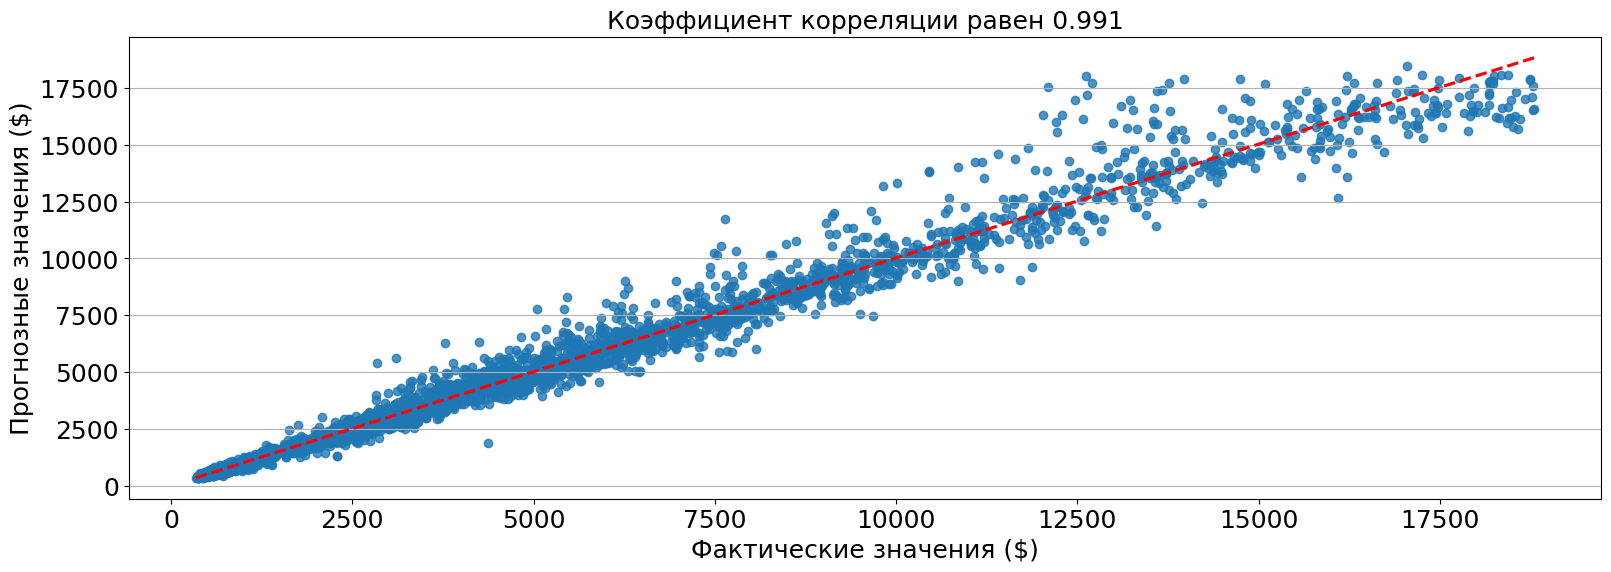

In [90]:
plt.figure(figsize=(19, 6))
coef_corr = np.corrcoef(y_val.values, y_pred_val)[0, 1]
plt.title(f"Коэффициент корреляции равен {coef_corr:.3f}", fontsize=18)
sns.regplot(x=y_val, y=y_pred_val, ci=None, line_kws=dict(color="r", linestyle="--"))
plt.xlabel("Фактические значения ($)", fontsize=18)
plt.ylabel("Прогнозные значения ($)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(axis="y")
plt.show()

In [91]:
errors = np.round(y_val - y_pred_val, 3)
errors

18606     378.0
24956     484.0
19049    -137.0
18649    1003.0
29684      13.0
          ...  
13807   -1426.0
956      -318.0
51347     -33.0
45750    -305.0
35522      -7.0
Name: Цена, Length: 5377, dtype: float64

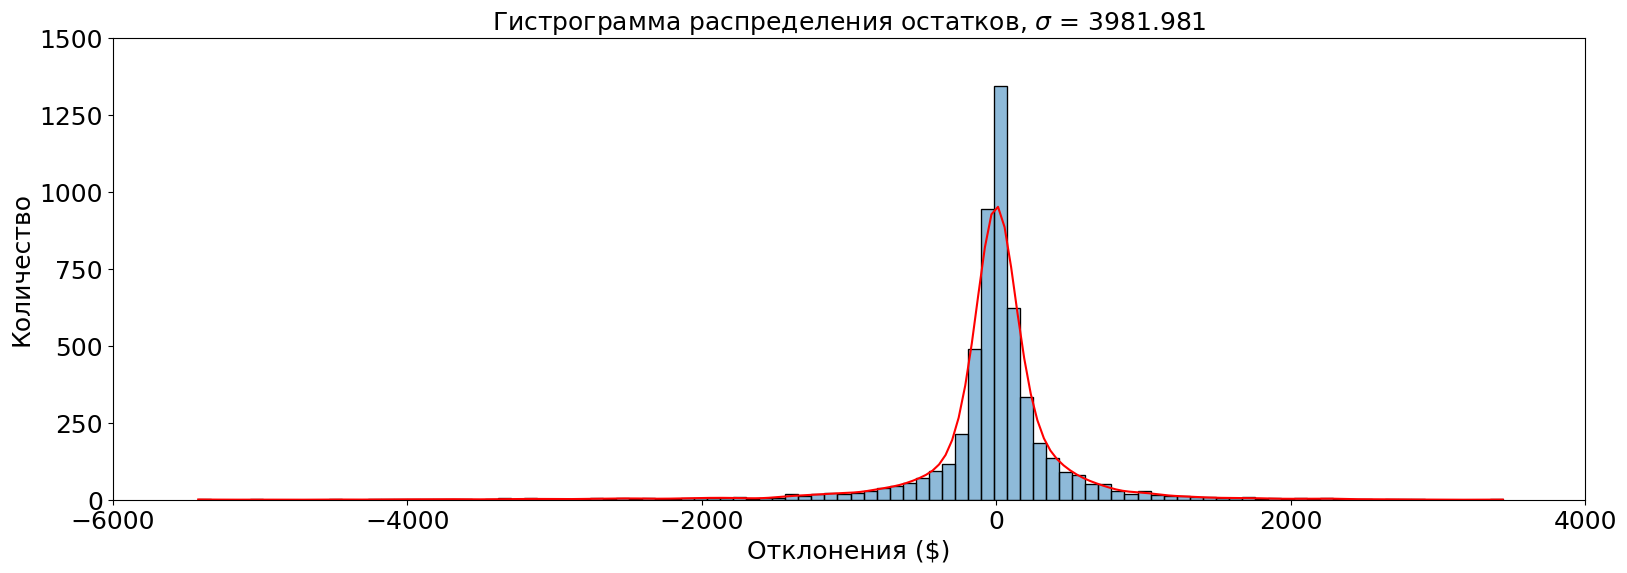

In [41]:
plt.figure(figsize=(19, 6))
ax = sns.histplot(x=errors, kde=True, bins=100)
ax.lines[0].set_color("red")
plt.title(
    rf"Гистрограмма распределения остатков, $\sigma$ = {y_val.std():.3f}",
    fontsize=18,
)
plt.xticks(np.arange(-6_000, 5_000, 2_000), fontsize=18)
plt.xlabel("Отклонения ($)", fontsize=18)
plt.yticks(np.arange(0, 1_750, 250), fontsize=18)
plt.ylabel("Количество", fontsize=18)
plt.show()

<h2><b>Вывод 13</b>: Судя по метрикам и графиком новая модель лучше справляется с прогнозированием. Было решено использовать ее в качестве итоговой.</h2>

<h1>Показатели на тестовой выборке</h1>

In [42]:
y_pred_test = model_new.predict(X_test).round()
evaluate(y_test, y_pred_test, len(X_test.columns))

RMSE равняется 534.540
MAE равняется 266.502
MAPE равняется 7.353 %
Adjusted R2 равняется 0.982


<center><h2>Метрики качества итоговой модели </h2>
<table>
  <tr>
    <td></td>
    <td><b>Train</b></td>
    <td><b>Validation</b></td>
    <td><b>Test</b></td>
  </tr>
  <tr>
    <td><b>RMSE</b></td>
    <td>519.539</td>
    <td>540.548</td>
    <td>534.540</td>
  </tr>
  <tr>
    <td><b>MAE</b></td>
    <td>250.616</td>
    <td>270.626</td>
    <td>266.502</td>
  </tr>
  <tr>
    <td><b>MAPE (%)</b></td>
    <td>6.886</td>
    <td>7.197</td>
    <td>7.353</td>
  </tr>
  <tr>
    <td><b>R<sup>2</sup><sub>adjusted</sub></b></td>
    <td>0.983</td>
    <td>0.982</td>
    <td>0.982</td>
  </tr>
</table></center>

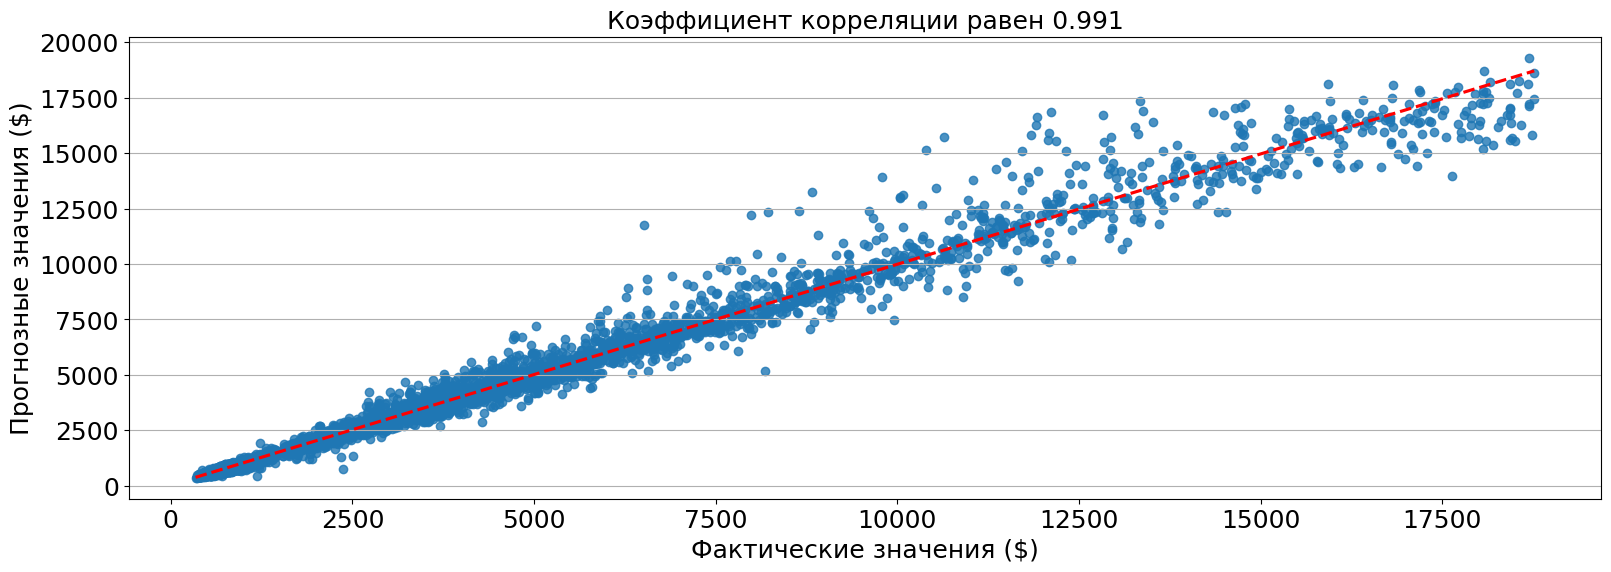

In [43]:
plt.figure(figsize=(19, 6))
coef_corr = np.corrcoef(y_test.values, y_pred_test)[0, 1]
plt.title(f"Коэффициент корреляции равен {coef_corr:.3f}", fontsize=18)
sns.regplot(x=y_test, y=y_pred_test, ci=None, line_kws=dict(color="r", linestyle="--"))
plt.xlabel("Фактические значения ($)", fontsize=18)
plt.ylabel("Прогнозные значения ($)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(axis="y")
plt.show()

In [44]:
errors = np.round(y_test - y_pred_test, 3)
errors

50395      78.0
50583      85.0
6889    -1464.0
49340      99.0
30818      94.0
          ...  
3030      -95.0
17661    -489.0
38053      54.0
41701    -100.0
35556     158.0
Name: Цена, Length: 5378, dtype: float64

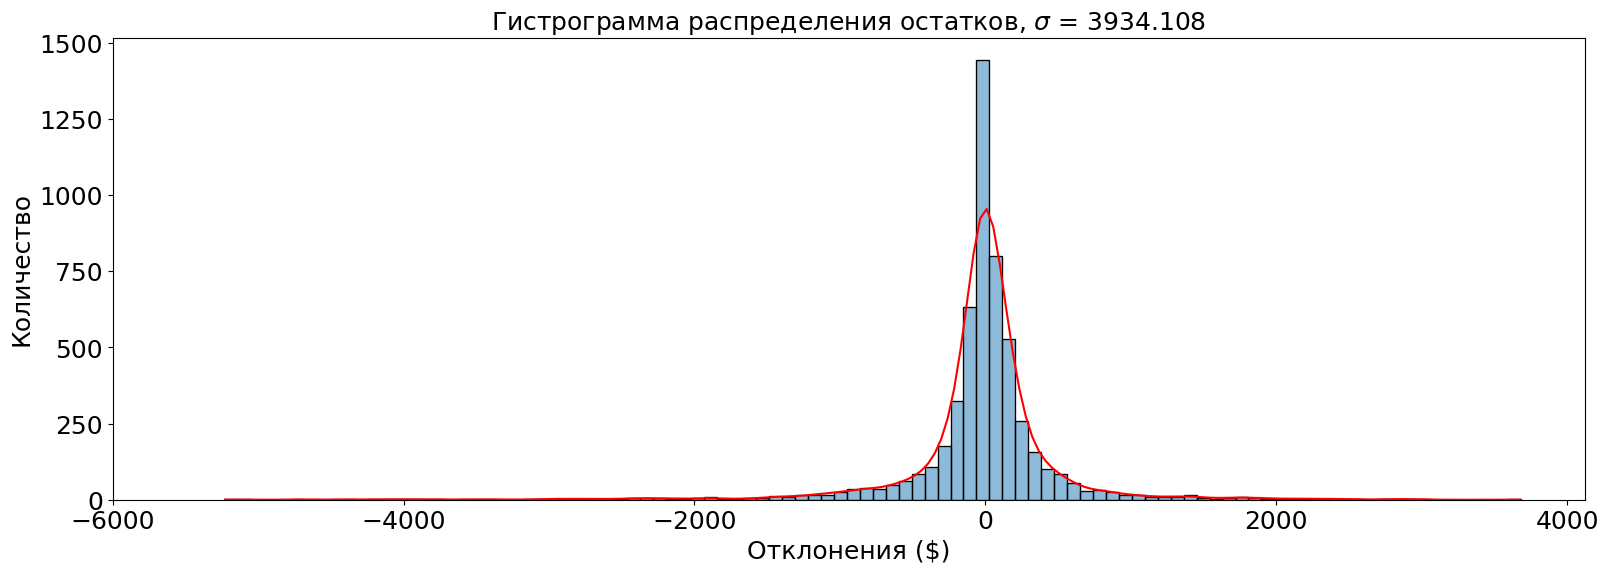

In [47]:
plt.figure(figsize=(19, 6))
ax = sns.histplot(x=errors, kde=True, bins=100)
ax.lines[0].set_color("red")
plt.title(
    rf"Гистрограмма распределения остатков, $\sigma$ = {y_test.std():.3f}",
    fontsize=18,
)
plt.xticks(np.arange(-6_000, 5_000, 2_000), fontsize=18)
plt.xlabel("Отклонения ($)", fontsize=18)
plt.yticks(np.arange(0, 1_750, 250), fontsize=18)
plt.ylabel("Количество", fontsize=18)
plt.show()

<h1>Выгрузка модели</h1>

In [49]:
model_new.fit(X, y)

,boosting_type,'gbdt'
,num_leaves,43
,max_depth,-1
,learning_rate,0.1
,n_estimators,780
,subsample_for_bin,200000
,objective,'mae'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [ ]:
joblib.dump(model, "diamond.model")